***DAY 1***

**Derivatives**

The extensive explaination part of the project upto the first hald has been removed for simplification. If you want to refer to the explain, you can refer :
            https://github.com/karpathy/nn-zero-to-hero/tree/master/lectures/micrograd

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We learnt about derivatives for getting an understanding of the gradient. *Something* to do with backpropogation. Basically to see the accuracy of the neural engine (*I guess*)

Creating Value class and object 

In [2]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other=other if isinstance(other, Value) else Value(other)
        out=Value(self.data+other.data, (self,other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __mul__(self,other):
        other=other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self,other):
        assert isinstance(other, (int, float))
        out=Value(self.data**other, (self, ),f'**{other}')
        
        def _backward():
            self.grad+=other*(self.data**(other-1))*out.grad
            
        out._backward=_backward
        
        return out
    
    def __rmul__(self,other):
        return self*other
    
    def __truediv__(self,other):
        return self*other**-1
    
    
    def __neg__(self):
        return -1*self
    
    def __sub__(self,other):
        return self+(-other)
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out
    
    def exp(self):
        x=self.data
        out=Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad+=out.data*out.grad
        
        out._backward=_backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
          if v not in visited:
            visited.add(v)
            for child in v._prev:
              build_topo(child)
            topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
          node._backward()

In [3]:
a=Value(2.0)
b=Value(4.0)
a-b

Value(data=-2.0)

For division, we can do something like
a/b
a*(1/b)
a*(b**-1)

Learn more about built-in class functions inside python

**Visualize using graphviz**

In [4]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s |data %.4f| grad %.4f }" % (n.label,n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

***DAY 2***

***DAY 3***

In [5]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

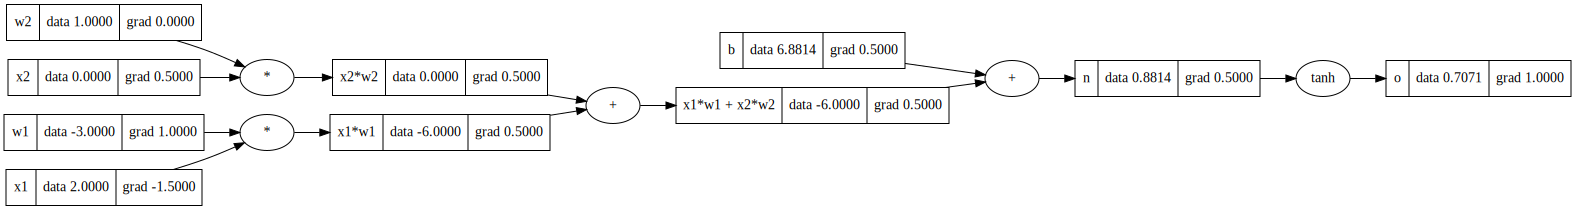

In [6]:
draw_dot(o)

***DAY 4***

In [7]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
e=(2*n).exp()
o = (e-1)/((e+1))
o.label = 'o'
o.backward()

In [8]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.1991, 0.7335, 0.9865],
        [0.1643, 0.9925, 0.8904],
        [0.6094, 0.1281, 0.4512],
        [0.0289, 0.4188, 0.8982],
        [0.1571, 0.2574, 0.6675]])


***DAY 5***

In [9]:
import torch
import random

In [10]:
#Pytorch uses tensor, meaning arrays of scalers
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
#.item() returns the scaler value in the tensor
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


**Creating a neuron using pytorch**

In [31]:
class Neuron:
    
    def __init__(self,nin):
        self.w=[Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b=Value(random.uniform(-1,1))
        
    def __call__(self,x):
        act= sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        out=act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    
class Layers:
    
    def __init__(self, nin, nout):
        self.neurons=[Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs=[n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
#         params =[]
#         for neuron in self.neurons:
#             ps=neuron.patrameters()
#             params.extend(ps)
#         return params 
#                   (OR)
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    def __init__(self, nin, nouts):
        sz=[nin]+nouts
        self.layers = [Layers(sz[i], sz[i+1]) for i in range(len(nouts))]
    
    def __call__(self,x):
        for layer in self.layers:
            x=layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]



***DAY 6***

In [106]:
    
x=[2.0,3.0,-1.0]
n=MLP(3,[4,4,1])
n(x)

Value(data=0.6650734326742882)

In [107]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [108]:
len(n.parameters())

41

In [109]:
#Putting the forward, backward and update function in a loop
for k in range(20):
    ypred=[n(x) for x in xs]
    loss=sum(((yout - ygt)**2 for ygt, yout in zip(ys,ypred)), Value(0))
    
    for p in n.parameters():
        p.grad=0.0
    loss.backward()
    
    for p in n.parameters():
        p.data += - 0.05*p.grad
    
    print(k, loss.data)

0 3.25574045434614
1 1.673257160987902
2 0.7346102795289533
3 0.3836684733528034
4 0.2475626161988541
5 0.17969259336053717
6 0.1397311000427441
7 0.1136856038854693
8 0.09548149127841513
9 0.08209673182970643
10 0.07187107336751408
11 0.06382142842464553
12 0.05733065230269721
13 0.051992766831330944
14 0.04753028102087994
15 0.04374737662975728
16 0.040502088719025754
17 0.03768908653475429
18 0.03522863796486231
19 0.03305932087834636


For extensive code for the second half (right after implementing backpropogation function), the link is:

https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/micrograd/micrograd_lecture_second_half_roughly.ipynb

**SUMMARY:**
    Neural net <br>
    MLP(Multi layer Perceptron) <br>
    Forward Pass->Loss function(Lower loss is the target)->BackPropogation(to get gradient)->Gradient decent(process of repeating the above process)
    